# Imputación con un Estadístico

Es una imputación de tipo Donante ya que requiere del calculo de un estadístico a partir de los datos originales.

## Ventajas

- Rápido y fácil de implementar

- La Media puede ser útil en presencia de outliers.

- No afecta el estadístico en cuestión ni el tamaño de la muestra.

## Desventajas

- Puede sesgar los resultados, dado que modifica la distribución por debajo (Curtosis)

- Se pierden correlaciones entre variables dado que noes muy preciso o muy real. Carece de variabilidad.

- No puede utilizarse en variables categóricas (a excepción de la Moda que utiliza el valor más frecuente)

## Librerías

In [1]:
import pandas as pd
import numpy as np  
import pandas as pd 
import seaborn as sns
import janitor 

## Cargar Datos

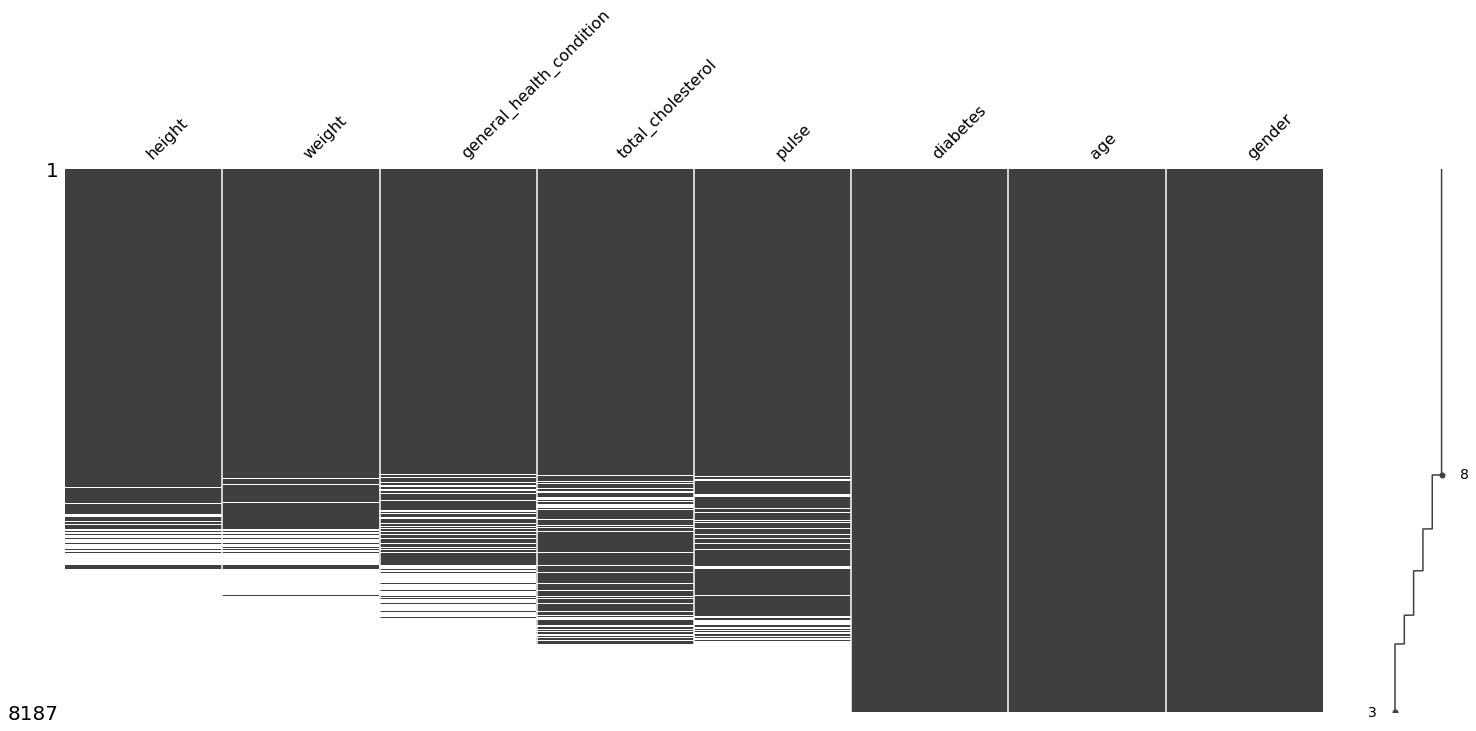

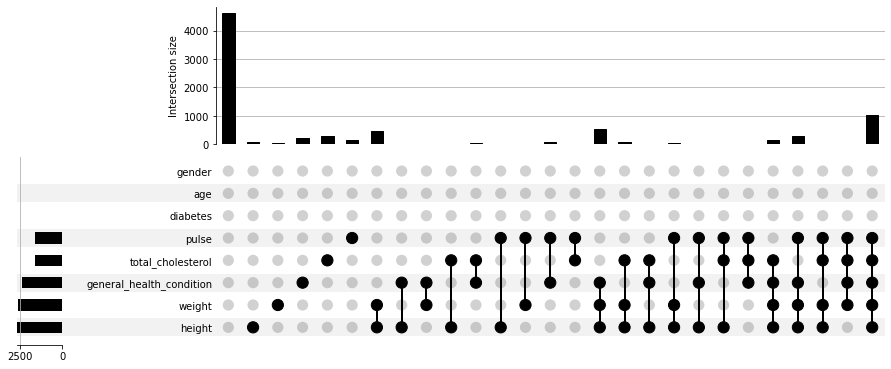

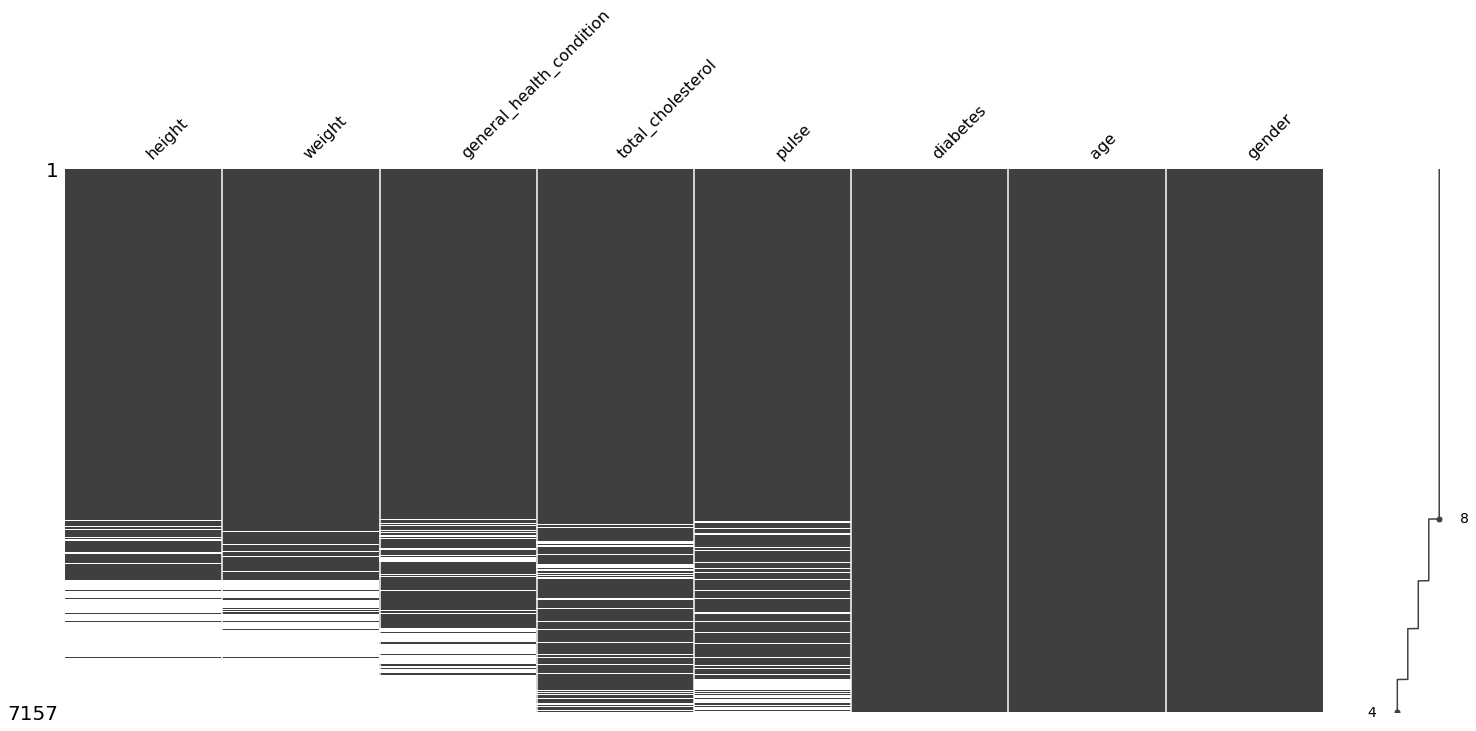

In [2]:
%run download_data_and_load.ipynb

## Importar Funciones Personalizadas

In [3]:
%run '../utils2.ipynb'

## Configuracion de Graficos

In [4]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 6)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

# Proceso de Imputacion

El DataFrame con el que vamos a trabajar es nhanes el cual contiene 8 variables y 7157 observaciones 

In [5]:
nhanes_df

,height,weight,general_health_condition,total_cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
93709.0,62.0,200.0,NaN,176.0,74.0,0,75.0,Female
93711.0,69.0,142.0,Very good,238.0,62.0,0,56.0,Male
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,33.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


Veamos el total de valores faltantes para cada variable

In [6]:
nhanes_df.isna().sum()

height                      1669
weight                      1604
general_health_condition    1360
total_cholesterol            592
pulse                        587
diabetes                       0
age                            0
gender                         0
dtype: int64

Seleccionamos la variable 'height' para imputar sus valores. Antes de ello, calculamos la Media de dicha variable sin imputar.

In [7]:
nhanes_df.height.mean()

66.25655976676384

Ahora imputamos los valores faltantes con el estadistico anteriormente calculado

In [8]:
(
    nhanes_df
    .transform_column(
        'height',
        lambda x: x.fillna(x.mean()),
        elementwise=False
    )
)

,height,weight,general_health_condition,total_cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93705.0,63.00000,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.00000,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,66.25656,NaN,Good,189.0,100.0,0,13.0,Male
93709.0,62.00000,200.0,NaN,176.0,74.0,0,75.0,Female
93711.0,69.00000,142.0,Very good,238.0,62.0,0,56.0,Male
...,...,...,...,...,...,...,...,...
102949.0,72.00000,180.0,Excellent,201.0,96.0,0,33.0,Male
102953.0,65.00000,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.00000,150.0,Good,172.0,78.0,0,41.0,Female


Verificamos que todos los valores de 'height' hayan sido imputados

In [9]:
(
    nhanes_df
    .transform_column(
        'height',
        lambda x: x.fillna(x.mean()),
        elementwise=False
    )
    .isna().sum()
)

height                         0
weight                      1604
general_health_condition    1360
total_cholesterol            592
pulse                        587
diabetes                       0
age                            0
gender                         0
dtype: int64

Calculamos nuevamente la media de 'height' con los valores ya imputados para ver si hubo algun cambion en el valor

In [10]:
(
    nhanes_df
    .transform_column(
        'height',
        lambda x: x.fillna(x.mean()),
        elementwise=False
    )
    .height.mean()
)

66.25655976676525

Como vemos, la media de 'height' no se altera, se mantiene a pesar de la imputacion. Es una de las caracteristica de este metodo.

## Visualizacion de la Imputacion

Ya resuelta la imputacion, es importante conocer que tan efectiva resulto en los datos, es decir, observar si los valores imputados alteran o sesgan la distribucion de datos. Para esta tarea, visualizamos los datos mediante un Scatterplot como sigue:  

- Creamos la Matriz Tabular para dos variables: 'height' y 'geight' con sus valores imputados. Esto se debe a que el grafico de Scatterplot contrasta los valores de dos variables numericas 

In [15]:
(
    nhanes_df
    .loc[:,['height', 'weight']]
    .missing.bind_shadow_matrix2(True, False, suffix = '_imp')
    .assign(
        height = lambda df: df.height.fillna(value = df.height.mean()),
        weight = lambda df: df.weight.fillna(value = df.weight.mean())
    )
)

,height,weight,height_imp,weight_imp
SEQN,,,,
93705.0,63.00000,165.000000,False,False
93706.0,68.00000,145.000000,False,False
93707.0,66.25656,178.462993,True,True
93709.0,62.00000,200.000000,False,False
93711.0,69.00000,142.000000,False,False
...,...,...,...,...
102949.0,72.00000,180.000000,False,False
102953.0,65.00000,218.000000,False,False
102954.0,66.00000,150.000000,False,False


- Creamos el grafico con los datos de las variables seleccionadas

<AxesSubplot:xlabel='height', ylabel='weight'>

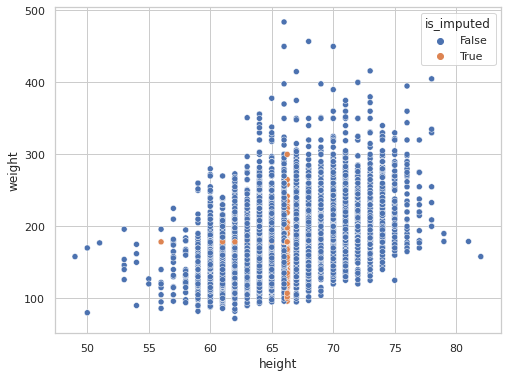

In [16]:
(
    nhanes_df
    .loc[:,['height', 'weight']]
    .missing.bind_shadow_matrix2(True, False, suffix = '_imp')
    .assign(
        height = lambda df: df.height.fillna(value = df.height.mean()),
        weight = lambda df: df.weight.fillna(value = df.weight.mean())
    )
    .missing.scatter_imputation_plot(x='height', y='weight')
)

El grafico nos muestra que la imputacion no rompe la estructura de los datos ni la relacion entre las variables: los valores imputados no se sale de la zona de los valores reales.

- Ahora agregamos la distribucion de los datos al grafico anterior para obtener una mejor visualizacion del comportamiento de los valores imputados

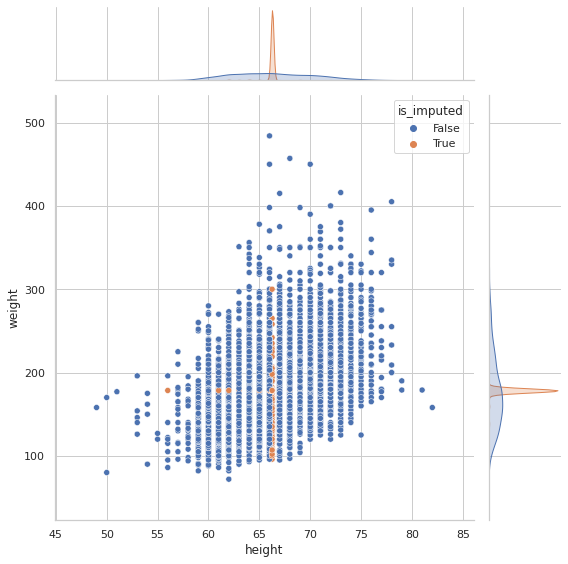

In [17]:
(
    nhanes_df
    .loc[:,['height', 'weight']]
    .missing.bind_shadow_matrix2(True, False, suffix = '_imp')
    .assign(
        height = lambda df: df.height.fillna(value = df.height.mean()),
        weight = lambda df: df.weight.fillna(value = df.weight.mean())
    )
    .missing.scatter_imputation_plot(
        x='height', 
        y='weight',
        show_marginal = True,
        height = 8
    )
)

El grafico nos muestra que los valores imputados se acumulan en un punto particular tanto en 'height' como 'weight' lo cual podria alterar la distribucion general de los datos.

En cocnlusion, la imputacion realizada es buena pero no la mejor para aplicar sobre las variables seleccionadas ya que, al carecer de variabilidad el valor de imputacion, afecta la distribucion de los datos.